In [2]:
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
import numpy as np
import scipy as sc
import math
from datetime import timedelta, datetime
from operator import attrgetter
import copy_plottrajectoriesfile as cpt
import matplotlib.animation as animation
import imageio
import matplotlib.pyplot as plt
import scipy.io as sio #to load matlab file
filenames = "../raw_imos_current_data/IMOS_OceanCurrent_HV_2019_C-20190520T232835Z.nc"
variables = {'U' : 'UCUR',
                'V' : 'VCUR'}
dimensions = {'lat' : 'LATITUDE',
                  'lon' : 'LONGITUDE',
                  'time' : 'TIME'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, deferred_load=False)

In [3]:
from netCDF4 import Dataset
dataset=Dataset(filenames)
#for i in dataset.variables:
 #   print(i)
print(dataset.variables['TIME'])

temps=np.array(dataset.variables['TIME'])
#print(temps)

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    long_name: analysis time
    standard_name: time
    units: days since 1985-01-01 00:00:00+00:00
    coordinate_type: TIME
    calendar: gregorian
unlimited dimensions: TIME
current shape = (111,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [4]:
datetime.fromtimestamp(0)

datetime.datetime(1970, 1, 1, 10, 0)

In [5]:
a=datetime.fromtimestamp(temps[0])
b=datetime(1985,1,1,0,0,0)


In [6]:
lati=fieldset.U.lat
longi=fieldset.U.lon
ucur=fieldset.U.data
vcur=fieldset.V.data
real_u=[]
real_v=[]
points=[[],[]]

for i in range(len(lati)):
    for j in range(len(longi)):
        points[0].append(lati[i])
        points[1].append(longi[j])
 #      points.append((lati[i],longi[j]))
        
for t in range(len(ucur)): 
    values_u=[]
    values_v=[]
    for i in range(len(lati)):
        for j in range(len(longi)):
            values_u.append(ucur[t,i,j])
            values_v.append(vcur[t,i,j])
    real_u.append(np.asarray(values_u))
    real_v.append(np.asarray(values_v))

points=np.asarray(points)
points=points.T

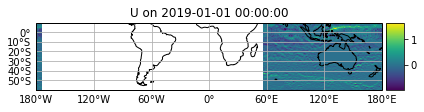

In [7]:
fieldset.U.show()

In [8]:
grid_x,grid_y = np.mgrid[-24:-36:120j, 150:160:100j]
grid=(grid_x,grid_y)

In [9]:
grid_y.size

12000

In [10]:
#u_new=np.zeros(len(real))
u_new=[[] for i in range(len(real_u))]
v_new=[[] for i in range(len(real_v))]
for i in range(len(real_u)):
    u_new[i] = sc.interpolate.griddata(points, real_u[i], grid, method='linear')
    v_new[i] = sc.interpolate.griddata(points, real_v[i], grid, method='linear')
    print("number "+str(i)+" done")

number 0 done
number 1 done
number 2 done
number 3 done
number 4 done
number 5 done
number 6 done
number 7 done
number 8 done
number 9 done
number 10 done
number 11 done
number 12 done
number 13 done
number 14 done
number 15 done
number 16 done
number 17 done
number 18 done
number 19 done
number 20 done
number 21 done
number 22 done
number 23 done
number 24 done
number 25 done
number 26 done
number 27 done
number 28 done
number 29 done
number 30 done
number 31 done
number 32 done
number 33 done
number 34 done
number 35 done
number 36 done
number 37 done
number 38 done
number 39 done
number 40 done
number 41 done
number 42 done
number 43 done
number 44 done
number 45 done
number 46 done
number 47 done
number 48 done
number 49 done
number 50 done
number 51 done
number 52 done
number 53 done
number 54 done
number 55 done
number 56 done
number 57 done
number 58 done
number 59 done
number 60 done
number 61 done
number 62 done
number 63 done
number 64 done
number 65 done
number 66 done
numbe

12418.0


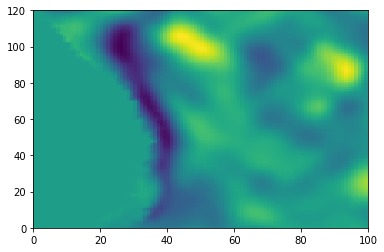

In [11]:
plt.pcolor(v_new[0])
print(temps[0])

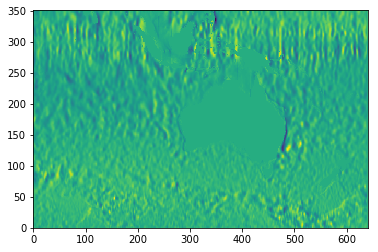

In [13]:
plt.pcolor(vcur[0])

Create .nc file for extrapolated values

In [609]:
import netCDF4
ncfile = netCDF4.Dataset('extrapolated_u_v.nc', mode='w', format='NETCDF4_CLASSIC')
print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 



In [610]:
lat_dim = ncfile.createDimension('lat', 12000) #can be appended
lon_dim = ncfile.createDimension('lon', 12000) #can be appended
time_dim = ncfile.createDimension('time', 111) #can be appended
for dim in ncfile.dimensions.items():
    print(dim)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 12000
)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 12000
)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 111
)


useless

In [612]:
lat = ncfile.createVariable('lat', np.float32, ('lat',))
lat.units = 'degrees_north'
lat.long_name = 'latitude'
lon = ncfile.createVariable('lon', np.float32, ('lon',))
lon.units = 'degrees_east'
lon.long_name = 'longitude'

In [613]:
time = ncfile.createVariable('time', np.float64, ('time',))
time.units = 'hours since 1800-01-01'
time.long_name = 'time'
u_cur = ncfile.createVariable('u_cur', np.float64, ('time','lat','lon'))
u_cur.units = 'm/s'
u_cur.standard_name = 'eastward_current_velocity'
v_cur = ncfile.createVariable('v_cur', np.float64, ('time','lat','lon'))
v_cur.units = 'm/s'
v_cur.standard_name = 'northward_current_velocity'

time from 1985

In [74]:
zero=datetime.fromtimestamp(0)
zero+=timedelta(days=365.25*15)

In [75]:
time=[]
for i in range(len(temps)):
    time.append(zero+timedelta(days=temps[i]))

In [81]:
for i in range(len(time)):
    time[i]=datetime.timestamp(time[i])

create fieldset with extrapolated data

In [85]:
u_new = np.array(u_new,dtype=np.float64)
v_new = np.array(v_new,dtype=np.float64)
time=np.array(time,dtype=np.float64)

In [86]:
data = {'U' : u_new,
        'V' : v_new}
dims = {'lon' : grid_y,
        'lat' : grid_x,
        'time' : time}

In [87]:
fieldset_new = FieldSet.from_data(data, dims, allow_time_extrapolation=True)

In [88]:
time

array([1.5462756e+09, 1.5463620e+09, 1.5464484e+09, 1.5465348e+09,
       1.5466212e+09, 1.5467076e+09, 1.5467940e+09, 1.5468804e+09,
       1.5469668e+09, 1.5470532e+09, 1.5471396e+09, 1.5472260e+09,
       1.5473124e+09, 1.5473988e+09, 1.5474852e+09, 1.5475716e+09,
       1.5476580e+09, 1.5477444e+09, 1.5478308e+09, 1.5479172e+09,
       1.5480036e+09, 1.5480900e+09, 1.5481764e+09, 1.5482628e+09,
       1.5483492e+09, 1.5484356e+09, 1.5485220e+09, 1.5486084e+09,
       1.5486948e+09, 1.5487812e+09, 1.5488676e+09, 1.5489540e+09,
       1.5490404e+09, 1.5491268e+09, 1.5492132e+09, 1.5492996e+09,
       1.5493860e+09, 1.5494724e+09, 1.5495588e+09, 1.5496452e+09,
       1.5497316e+09, 1.5498180e+09, 1.5499044e+09, 1.5499908e+09,
       1.5500772e+09, 1.5501636e+09, 1.5502500e+09, 1.5503364e+09,
       1.5504228e+09, 1.5505092e+09, 1.5505956e+09, 1.5506820e+09,
       1.5507684e+09, 1.5508548e+09, 1.5509412e+09, 1.5510276e+09,
       1.5511140e+09, 1.5512004e+09, 1.5512868e+09, 1.5513732e

In [125]:
def DeleteParticle(particle, fieldset, time):
    particle.delete()
import imageio
pset = ParticleSet.from_list(fieldset=fieldset_new,
                             pclass=JITParticle,
                             lon=[151.2,  151.3],
                             lat=[-33.92, -33.9],
                             time=12418)  
images=[]
pset.execute(AdvectionRK4, runtime=timedelta(days=10), dt=-timedelta(minutes=5), recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle}, output_file=pset.ParticleFile(name="TRY.nc", outputdt=timedelta(hours=1)))
plotTrajectoriesFile('TRY.nc', mode='movie2d_notebook')
#plotTrajectoriesFile('TRY.nc',mode='movie2d_notebook', tracerfile='')

    #images.append(imageio.imread('../outputs_imos_current_data/make_gif/particle_try_'+str(i)+'.png'))
#imageio.mimsave('../outputs_imos_current_data/particle_advection_reverse_try2.gif', images)

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-13529592/30fc4f900be1eec831f087c4965ab1c2.so


In [144]:
def DeleteParticle(particle, fieldset, time):
    particle.delete()
import imageio
pset = ParticleSet.from_list(fieldset=fieldset_new,
                             pclass=JITParticle,
                             lon=[151.2,  151.3],
                             lat=[-33.92, -33.9],
                             time=time[0])
images=[]
pset.execute(AdvectionRK4, runtime=timedelta(days=10), dt=-timedelta(minutes=5), recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
for i in range(10):
    pset.show(savefile='../outputs_imos_current_data/make_gif/particle_try_'+str(i),field='vector', vmin=0., vmax=1.5,land=False,show_time=time[i])
    images.append(imageio.imread('../outputs_imos_current_data/make_gif/particle_try_'+str(i)+'.png'))
imageio.mimsave('../outputs_imos_current_data/particle_advection_reverse2.gif', images)

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-13529592/07ffc8c1a4d8575ec39ae7b251574fea.so
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_0.png
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_1.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_2.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_3.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_4.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_5.png
INFO: Plot saved to 

In [155]:
time[9]-time[8]

86400.0

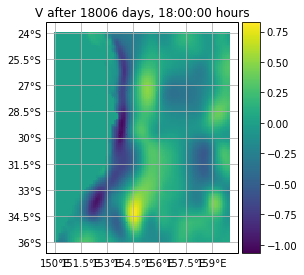

In [187]:
fieldset_new.V.show(show_time=time[110],land=False)

In [239]:
def DeleteParticle(particle, fieldset, time):
    particle.delete()
import imageio
pset = ParticleSet.from_list(fieldset=fieldset_new,
                             pclass=JITParticle,
                             lon=[151.2,  151.3],
                             lat=[-33.92, -33.9],
                             time=time[5])
images=[]
for i in range(48):
    pset.execute(AdvectionRK4, runtime=timedelta(hours=i), dt=-timedelta(minutes=5), recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
    pset.show(savefile='../outputs_imos_current_data/make_gif/particle_try_'+str(i),field='vector', vmin=0., vmax=1.5,land=False,show_time=(time[5]+i*86400/24))
    images.append(imageio.imread('../outputs_imos_current_data/make_gif/particle_try_'+str(i)+'.png'))
imageio.mimsave('../outputs_imos_current_data/particle_advection_2days.gif', images)

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-13529592/abc5581984793bf61bca7926a4b473de.so
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_0.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_1.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_2.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_3.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_4.png
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_try_5.png
INFO: Plot saved to 

Add Brownian Motion Kernel

In [219]:
from parcels import (FieldSet, AdvectionRK4, BrownianMotion2D, Field,
                     ParticleSet, JITParticle, Variable, ErrorCode)
size2D = (fieldset_new.U.grid.ydim, fieldset_new.U.grid.xdim)
fieldset_new.add_field(Field('Kh_zonal', data=2.65e-2*np.ones(size2D),
                             lon=fieldset_new.U.grid.lon, lat=fieldset_new.U.grid.lat,
                             mesh='spherical', allow_time_extrapolation=True))
fieldset_new.add_field(Field('Kh_meridional', data=2.65e-2*np.ones(size2D),
                             lon=fieldset_new.U.grid.lon, lat=fieldset_new.U.grid.lat,
                             mesh='spherical', allow_time_extrapolation=True))


In [220]:
from parcels import BrownianMotion2D

INFO: Compiled JITParticleAdvectionRK4BrownianMotion2D ==> /tmp/parcels-13529592/22611023c26a743dbe0f46cdf272e473.so


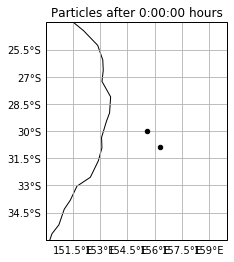

P[234](lon=155.600006, lat=-30.000000, depth=0.000000, time=1546275600.000000)
P[235](lon=156.300003, lat=-30.900000, depth=0.000000, time=1546275600.000000)


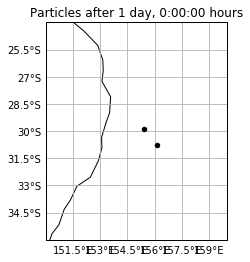

P[234](lon=155.424347, lat=-29.882019, depth=0.000000, time=1546362000.000000)
P[235](lon=156.128433, lat=-30.794466, depth=0.000000, time=1546362000.000000)


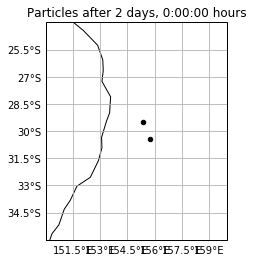

P[234](lon=155.342087, lat=-29.487522, depth=0.000000, time=1546534800.000000)
P[235](lon=155.729858, lat=-30.453350, depth=0.000000, time=1546534800.000000)


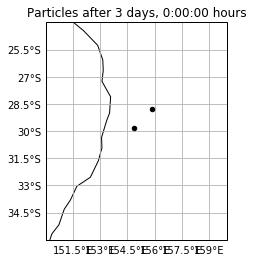

P[234](lon=155.862595, lat=-28.768341, depth=0.000000, time=1546794000.000000)
P[235](lon=154.873245, lat=-29.854189, depth=0.000000, time=1546794000.000000)


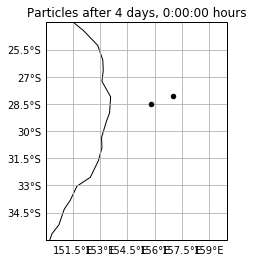

P[234](lon=157.033066, lat=-28.041794, depth=0.000000, time=1547139600.000000)
P[235](lon=155.774841, lat=-28.515369, depth=0.000000, time=1547139600.000000)


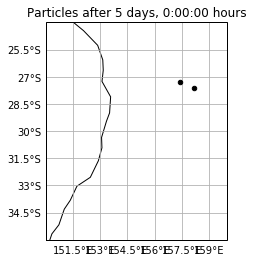

P[234](lon=158.158875, lat=-27.621616, depth=0.000000, time=1547571600.000000)
P[235](lon=157.425491, lat=-27.317514, depth=0.000000, time=1547571600.000000)


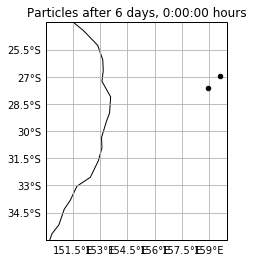

P[234](lon=158.954300, lat=-27.642708, depth=0.000000, time=1548090000.000000)
P[235](lon=159.610199, lat=-26.983698, depth=0.000000, time=1548090000.000000)


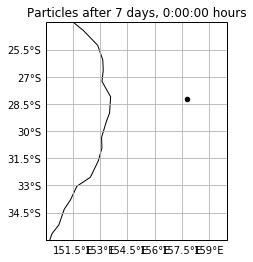

P[234](lon=157.801697, lat=-28.222963, depth=0.000000, time=1548694800.000000)


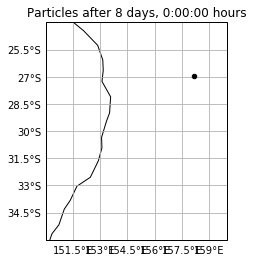

P[234](lon=158.154633, lat=-26.953506, depth=0.000000, time=1549386000.000000)


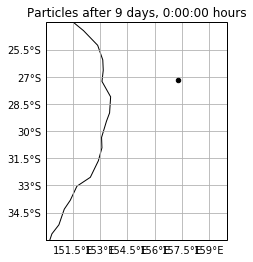

P[234](lon=157.292648, lat=-27.184116, depth=0.000000, time=1550163600.000000)


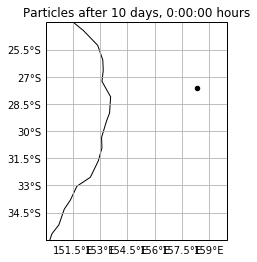

P[234](lon=158.336258, lat=-27.630598, depth=0.000000, time=1551027600.000000)


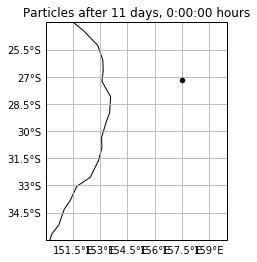

P[234](lon=157.522888, lat=-27.203819, depth=0.000000, time=1551978000.000000)


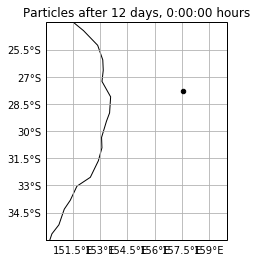

P[234](lon=157.560272, lat=-27.766216, depth=0.000000, time=1553014800.000000)


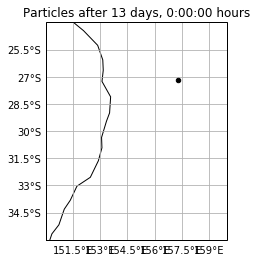

P[234](lon=157.315094, lat=-27.187778, depth=0.000000, time=1554138000.000000)


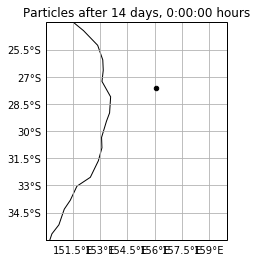

P[234](lon=156.081955, lat=-27.626755, depth=0.000000, time=1555347600.000000)


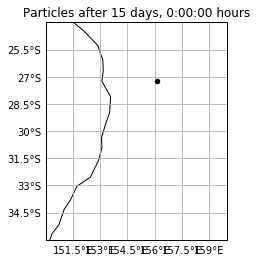

P[234](lon=156.127518, lat=-27.212749, depth=0.000000, time=1556643600.000000)


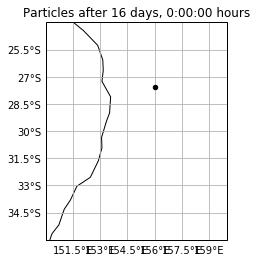

P[234](lon=155.998489, lat=-27.569439, depth=0.000000, time=1558026000.000000)


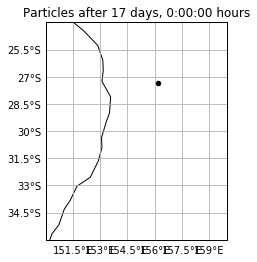

P[234](lon=156.200943, lat=-27.342777, depth=0.000000, time=1559494800.000000)


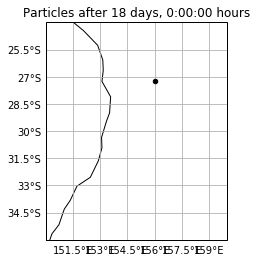

P[234](lon=156.030014, lat=-27.254414, depth=0.000000, time=1561050000.000000)


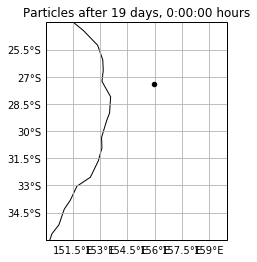

P[234](lon=155.952011, lat=-27.389881, depth=0.000000, time=1562691600.000000)


In [249]:
pset = ParticleSet.from_list(fieldset=fieldset_new,
                             pclass=JITParticle,
                             lon=[155.6,  156.3],
                             lat=[-30, -30.9],
                             time=time[0])  
images=[]
kernels=pset.Kernel(AdvectionRK4)+pset.Kernel(BrownianMotion2D)
for i in range(20):
    pset.execute(kernels, runtime=timedelta(days=i), dt=timedelta(minutes=5), recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
    pset.show(show_time=timedelta(days=i))
    print(pset)

In [247]:
def NorthEast(particle, fieldset, time):
    particle.lon += 0.001*particle.dt
    particle.lat += 0.001*particle.dt

pset = ParticleSet.from_list(fieldset=fieldset_new,
                             pclass=JITParticle,
                             lon=[151.6,  152.3],
                             lat=[-33, -33.9],
                             time=time[0])  
images=[]
kernels=pset.Kernel(AdvectionRK4)+pset.Kernel(NorthEast)+pset.Kernel(BrownianMotion2D)
for i in range(1):
    pset.execute(kernels, runtime=timedelta(hours=i), dt=timedelta(minutes=5), recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
    pset.show(show_time=(time[0]+i*86400/24),savefile='../outputs_imos_current_data/make_gif/particle_kernel_try_'+str(i)+'.png', field='vector', vmin=0., vmax=1.5,land=False)
    images.append(imageio.imread('../outputs_imos_current_data/make_gif/particle_kernel_try_'+str(i)+'.png'))
imageio.mimsave('../outputs_imos_current_data/particle_advection_try.gif', images)

INFO: Compiled JITParticleAdvectionRK4NorthEastBrownianMotion2D ==> /tmp/parcels-13529592/39738389d503b41b9afabe83e66e6989.so
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/z3529592/anaconda3/envs/py3_parcels/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)
INFO: Plot saved to ../outputs_imos_current_data/make_gif/particle_kernel_try_0.png.png
